<a href="https://colab.research.google.com/github/gaboojie/project_gss/blob/main/GSS_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary

> For this project, our research question was: "Can we determine the impact of age, religion, happiness, and education on political views?" In order to answer this question, we used a lot of different methods, involving different types of graphs and visualizations to come closer to our goal. In order to have clean, un-skewed graphs, we first needed to clean our data. We first removed all of our unclean data, and changed our year range to only include data from the years 2012-2022. We also changed some column names to make our data more readable, as well as cleaning all of our important variables. Our important variables included religion, age, degree, education, happiness, and political_view. We cleaned these variables by converting the necessary ones to numeric, removing NAs and replacing them with unkown, removing .0s or unnecessary data from our dataframes. Also, for political_view, to make it easier to visualize our data in graphs, we created the political_view_id variable, which is a number between 1 and 7 representing someone's political view. 1 stands for very liberal, and 7 stands for very conservative.




Load selected variables into selected_gss_data.csv:

In [ ]:
import pandas as pd
#
var_list = ['year', 'age', 'educ', 'relig', 'happy', 'zodiac','polviews', 'degree'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    #print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    #print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode



Read .csv into memory.

In [ ]:
df = pd.read_csv('selected_gss_data.csv', low_memory=False)

Only include the years from 2012 to 2022 (2022 is the latest data, as the older data may reflect different trends and that is not the focus of this investigation)

In [ ]:
# Remove any entries in table that specify the word 'year' as they represent uncleaned data and only
# specify which column represents which variable (it's data that should be completely ignored as it represents a row
# with all the variables included like at the top of the table)
df = df.loc[df['year'] != 'year']

# Cast year to number
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Filter out the years only between 2012 and 2022
df = df.loc[(df.year >= 2012) & (df.year <= 2022)]

# Now only includes data from 2012 to 2022
print(df, '\n')

       year   age  educ       relig         happy     zodiac  \
55089  2012  22.0  16.0    catholic    very happy      libra   
55090  2012  21.0  12.0    catholic    very happy      aries   
55091  2012  42.0  12.0  protestant  pretty happy      aries   
55092  2012  49.0  13.0  protestant    very happy  capricorn   
55093  2012  70.0  16.0  protestant    very happy     taurus   
...     ...   ...   ...         ...           ...        ...   
72387  2022  22.0  12.0       other  pretty happy  capricorn   
72388  2022  29.0  19.0    catholic  pretty happy     cancer   
72389  2022  32.0  15.0        none  pretty happy    scorpio   
72390  2022  49.0  17.0        none    very happy    scorpio   
72391  2022  50.0  20.0        none  pretty happy      libra   

                           polviews                    degree  
55089  moderate, middle of the road                bachelor's  
55090         slightly conservative               high school  
55091         slightly conservative    

<ipython-input-4-93ff14e41965>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_numeric(df['year'], errors='coerce')


See count of NAs in dataframe df:

In [ ]:
print("Rows, columns:", df.shape)
df.isna().sum()

Rows, columns: (17303, 8)


year          0
age         572
educ        101
relig       211
happy        72
zodiac      995
polviews    587
degree       31
dtype: int64

Change column names:

In [ ]:
df = df.rename(columns = {'educ':'education',
                    'relig':'religion',
                    'polviews':'political_view', 'degree':'degree_obtained'})

Clean religion variable: (by capitalizing/editing any religion type and replacing any NAs with unknown).

In [ ]:
# Capitalize religion type
to_replace = {'catholic': 'Catholic', 'protestant': 'Protestant', 'christian': 'Christian', 'none': 'None',
              'orthodox-christian': 'Orthodox-Christian', 'hinduism': 'Hinduism', 'other': 'Other', 'muslim/islam': 'Islam',
              'other eastern religions': 'Other Eastern Religions', 'buddhism': 'Buddhism', 'inter-nondenominational': 'Inter-Nondenominational',
              'native american': 'Native American', 'relig': 'Unknown'}
df['religion'] = df['religion'].map(to_replace)

# Replace any NAs with unknown and
df['religion'].fillna('Unknown', inplace=True) #replace NAs with 'unknown'

# Print uniques
print(df['religion'].unique())

['Catholic' 'Protestant' 'Christian' 'None' 'Orthodox-Christian'
 'Hinduism' 'Unknown' 'Other' 'Islam' 'Other Eastern Religions' 'Buddhism'
 'Inter-Nondenominational' 'Native American']


Clean age variable: (by casting ages to integers and leaving nans as-is in order to graph as it is a numerical type)

In [ ]:
# Typecast age to float/numeric
df['age'] = pd.to_numeric(df['age'],errors='coerce')

# Converts age to integer and removes the .0 at the end
df['age'] = df['age'].apply(lambda x: int(x) if pd.notnull(x) else x)

print(df['age'].unique())

[22. 21. 42. 49. 70. 50. 35. 24. 28. 55. 36. 59. 52. 47. 18. 76. 39. 54.
 45. 71. 81. 44. 78. 63. 73. 40. 62. 27. 30. 29. 69. 51. 57. 68. 84. 38.
 46. 41. 75. 67. 48. 56. 43. 32. 23. 64. 34. 33. nan 19. 26. 60. 66. 53.
 58. 72. 74. 82. 61. 31. 65. 77. 25. 20. 89. 87. 83. 37. 85. 80. 86. 79.
 88.]


Clean degree variable: (by capitalizing each degree type and replacing NA's with unknowns)

In [ ]:
# Capitalize each degree type
to_replace = {"bachelor's": "Bachelor's", "high school": "High School", "associate/junior college": "Associate/Junior College",
              "less than high school": 'Less Than High School', "graduate": "Graduate", "unknown": 'Unknown', "degree": "Unknown"}
df['degree_obtained'] = df['degree_obtained'].map(to_replace)

# Replace NA's with Unknowns
df['degree_obtained'].fillna('Unknown', inplace=True) #replace NAs with 'unknown'

# Print uniques
print(df['degree_obtained'].unique())

["Bachelor's" 'High School' 'Associate/Junior College'
 'Less Than High School' 'Graduate' 'Unknown']


Clean education variable: (by casting to number and as it is a numeric type, keep NA's for graphing purposes)

In [ ]:
# Typecast education to float/numeric
df['education'] = pd.to_numeric(df['education'], errors='coerce')

# Converts age to integer and removes the .0 at the end
df['education'] = df['education'].apply(lambda x: int(x) if pd.notnull(x) else x)

# Print uniques
print(df['education'].unique())

[16. 12. 13. 19. 15. 11.  9. 17. 10.  4.  0. 14. 18. 20.  8.  6.  5.  7.
 nan  3.  1.  2.]


Clean happy variable: (Replace any NA's with 'Unknown')

In [ ]:
# Capitalize and recategorize
to_replace = {'very happy': 'Very Happy', 'pretty happy': 'Moderately Happy', 'not too happy': 'Not Happy'}
df['happy'] = df['happy'].map(to_replace)

# Replace any NA's with Unknown
df['happy'].fillna('Unknown', inplace=True)

# Print uniques
print(df['happy'].unique())

['Very Happy' 'Moderately Happy' 'Not Happy' 'Unknown']


Clean political_view variable: (capitalizing and renaming certain types to be less vague and replacing any NAs with Unknown). Then, creating new variable (political_view_id) that represents how liberal (1) to how conservative (7) a person is.



In [ ]:
# Capitalize/edit naming of political view
to_replace = {'extremely liberal': "Extremely Liberal", 'liberal': 'Liberal', 'slightly liberal': 'Slightly Liberal', 'moderate, middle of the road': 'Moderate',
              "slightly conservative": 'Slightly Conservative', 'conservative': 'Conservative', 'extremely conservative': 'Extremely Conservative'}
df['political_view'] = df['political_view'].map(to_replace)

# Map political view to political view id
to_replace = {'Extremely Liberal': 1, 'Liberal': 2, 'Slightly Liberal': 3, 'Moderate': 4, 'Slightly Conservative': 5,
              'Conservative': 6, 'Extremely Conservative': 7}
df['political_view_id'] = df['political_view'].map(to_replace)

# Replace NAs with 'Unknown' only for political_view (categorical data type) and not political_view_id (numerical data type)
df['political_view'].fillna('Unknown', inplace=True)

# Print uniques
print(df['political_view'].unique())
print(df['political_view_id'].unique())

['Moderate' 'Slightly Conservative' 'Liberal' 'Conservative'
 'Extremely Liberal' 'Unknown' 'Extremely Conservative' 'Slightly Liberal']
[ 4.  5.  2.  6.  1. nan  7.  3.]


Plot visualizations:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Must run this code snippet before graphing any plot (below)

<Axes: >

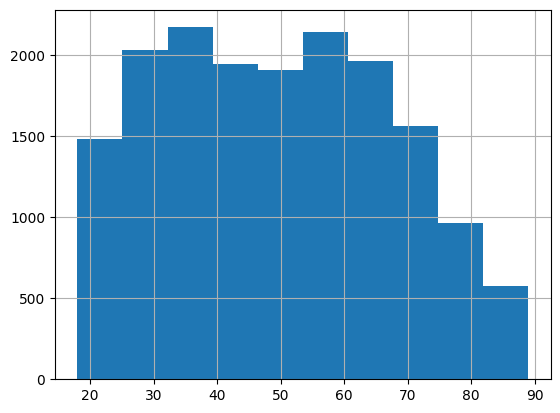

In [ ]:
# looking at distribution of ages surveyed
df['age'].hist(bins=10)

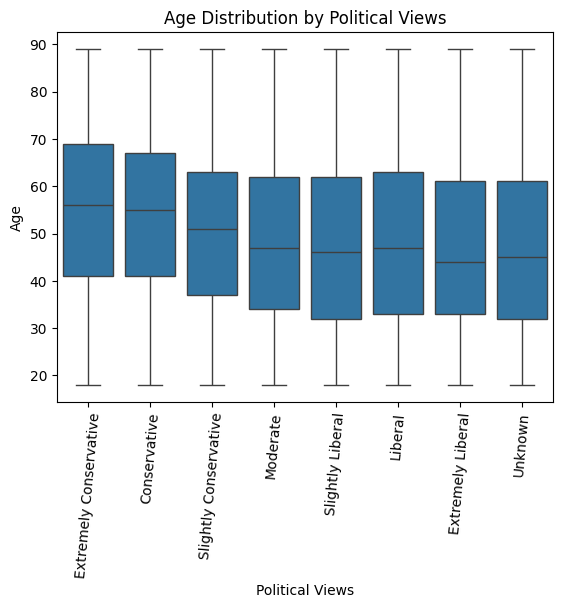

In [ ]:
#boxplot of age against political views
political_order = ['Extremely Conservative', 'Conservative', 'Slightly Conservative', 'Moderate', 'Slightly Liberal', 'Liberal', 'Extremely Liberal', 'Unknown']
sns.boxplot(x='political_view', y='age', data=df, order=political_order)
plt.title("Age Distribution by Political Views")
plt.suptitle("") #gets rid of unneeded title
plt.xlabel("Political Views")
plt.ylabel("Age")
plt.xticks(rotation=85)
plt.show()

<Axes: xlabel='age', ylabel='Density'>

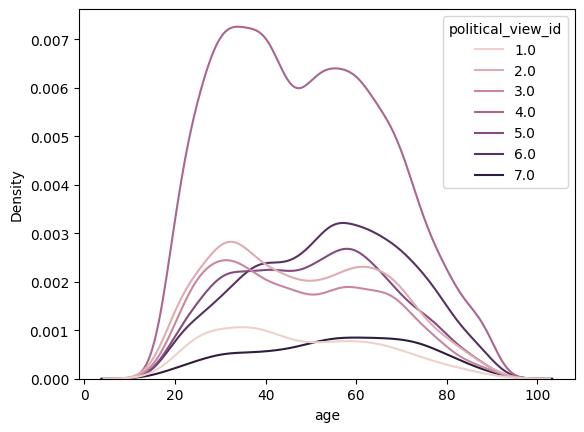

In [ ]:
# depicts a strong neutral political view for middle-ages
sns.kdeplot(data=df,x='age', hue='political_view_id')

<Axes: xlabel='education', ylabel='Density'>

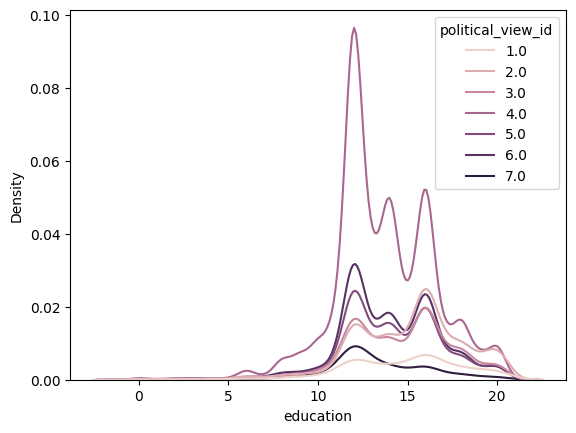

In [ ]:

sns.kdeplot(data=df,x='education', hue='political_view_id')

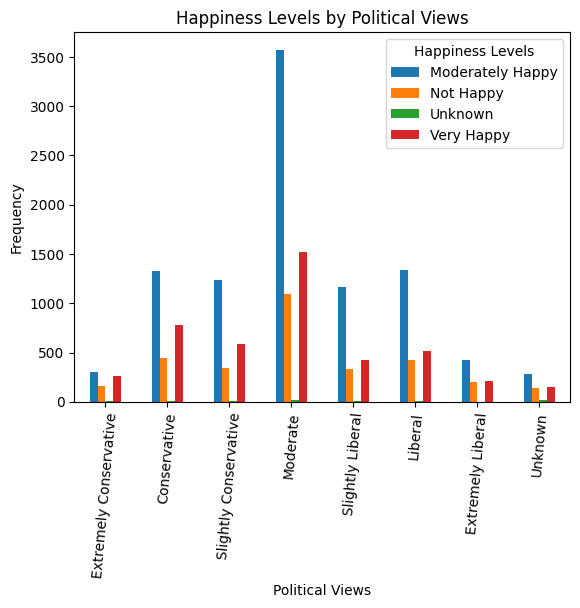

In [ ]:
#plot a clustered barplot counting frequencies of happiness per political view
political_order = ['Extremely Conservative', 'Conservative', 'Slightly Conservative', 'Moderate', 'Slightly Liberal', 'Liberal', 'Extremely Liberal', 'Unknown']
df['political_view'] = pd.Categorical(df['political_view'], categories=political_order, ordered=True) #change order of political views
aggregated_data = df.groupby(['political_view', 'happy']).size().unstack(fill_value=0) #aggregate data to see count of occurences of each combination
aggregated_data.plot(kind='bar', stacked=False)
plt.title("Happiness Levels by Political Views")
plt.xlabel("Political Views")
plt.ylabel("Frequency")
plt.xticks(rotation=85)
plt.legend(title="Happiness Levels")
plt.show()

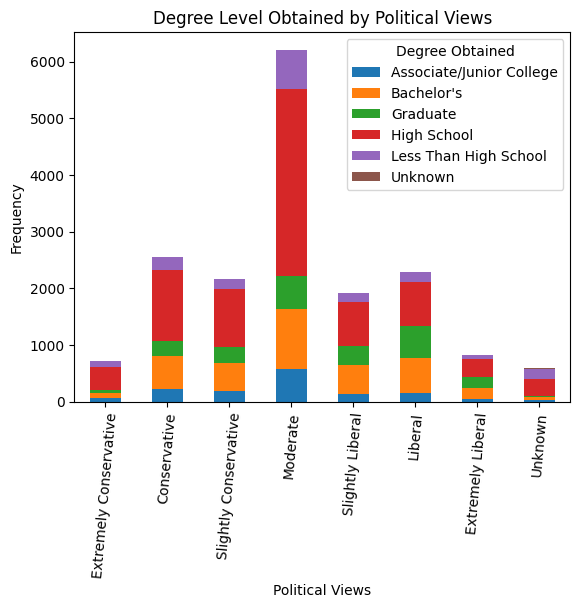

In [ ]:
#plot a stacked barplot of degree levels per each political view
political_order = ['Extremely Conservative', 'Conservative', 'Slightly Conservative', 'Moderate', 'Slightly Liberal', 'Liberal', 'Extremely Liberal', 'Unknown']
df['political_view'] = pd.Categorical(df['political_view'], categories=political_order, ordered=True) #change order of political views
aggregated_data = df.groupby(['political_view', 'degree_obtained']).size().unstack(fill_value=0) #aggregate data to see count of occurences of each combination
aggregated_data.plot(kind='bar', stacked=True)
plt.title("Degree Level Obtained by Political Views")
plt.xlabel("Political Views")
plt.ylabel("Frequency")
plt.xticks(rotation=85)
plt.legend(title="Degree Obtained")
plt.show()

Looking at relationships with age and happiness before visualizing with political affiliation

In [ ]:
pd.crosstab(df['age'], df['happy'])

happy,Moderately Happy,Not Happy,Unknown,Very Happy
age,,,,
18.0,47,16,0,10
19.0,84,28,1,34
20.0,100,27,1,24
21.0,102,37,0,46
22.0,133,47,0,40
...,...,...,...,...
85.0,31,11,0,16
86.0,30,12,0,28
87.0,22,11,0,9


<Axes: xlabel='age', ylabel='Count'>

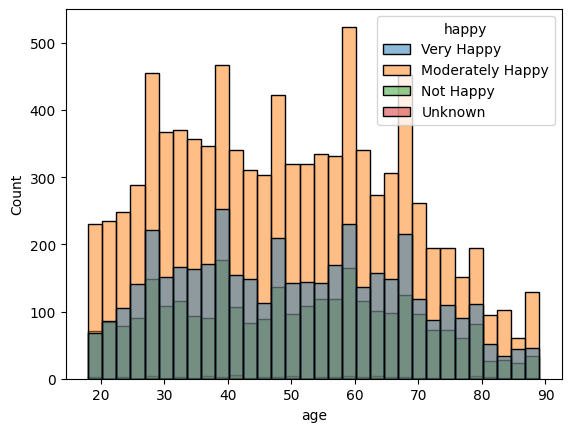

In [ ]:
sns.histplot(data=df, x='age', hue='happy')

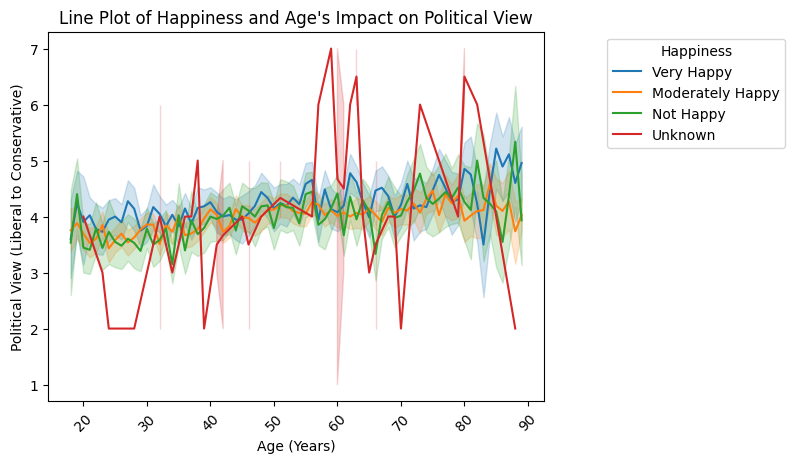

In [ ]:
#
# Plot of age and happiness (Independent Variables) vs political view (Dependent Variables)
#
curr_plot = sns.lineplot(data=df, x="age", y="political_view_id", hue="happy")

curr_plot.tick_params(axis='x', rotation=45)
curr_plot.set(xlabel='Age (Years)', ylabel='Political View (Liberal to Conservative)', title="Line Plot of Happiness and Age's Impact on Political View")
curr_plot.legend(title='Happiness')
sns.move_legend(curr_plot, "upper right", bbox_to_anchor=(1.5, 1))

Looking at the relationship between (years of) education with political views

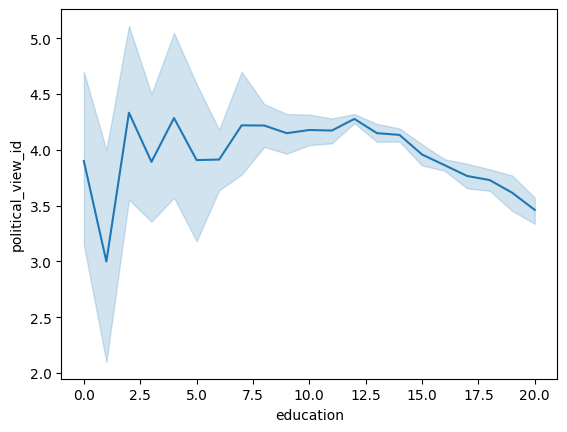

In [ ]:
base=sns.lineplot(data=df, x='education', y='political_view_id')

Analyzing the relationship between years of education and age

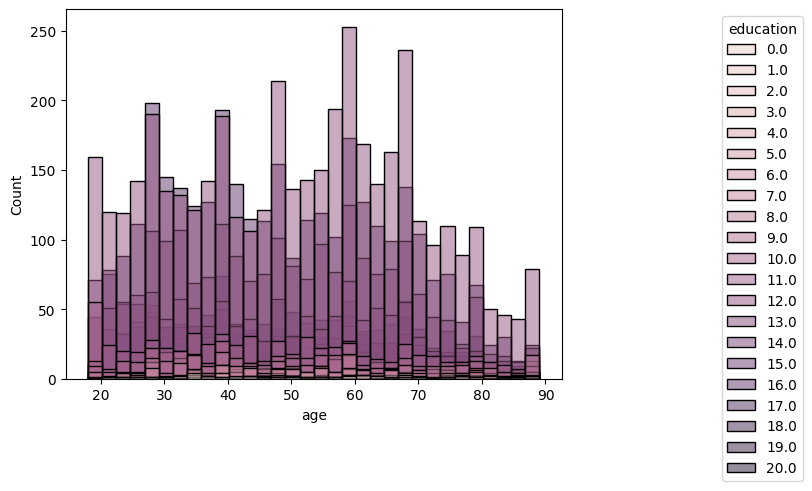

In [ ]:
base=sns.histplot(data=df, x='age', hue='education')
sns.move_legend(base, "upper right", bbox_to_anchor=(1.5, 1))

<Axes: xlabel='age', ylabel='Count'>

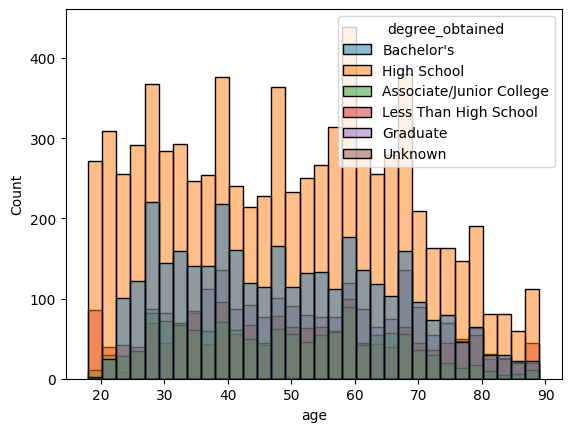

In [ ]:
sns.histplot(data=df, x='age', hue='degree_obtained')

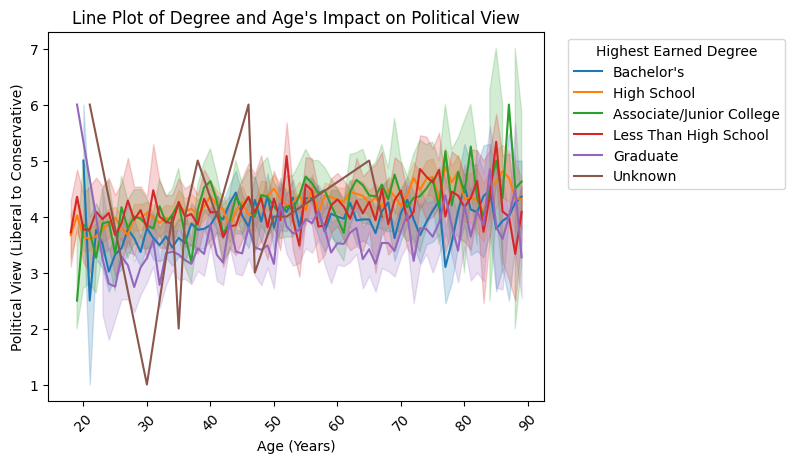

In [ ]:
#
# Plot of degree and age (Independent Variables) vs political view (Dependent Variables)
#
curr_plot = sns.lineplot(data=df, x="age", y="political_view_id", hue="degree_obtained")

curr_plot.tick_params(axis='x', rotation=45)
curr_plot.set(xlabel='Age (Years)', ylabel='Political View (Liberal to Conservative)', title="Line Plot of Degree and Age's Impact on Political View")
curr_plot.legend(title='Highest Earned Degree')
sns.move_legend(curr_plot, "upper right", bbox_to_anchor=(1.5, 1))

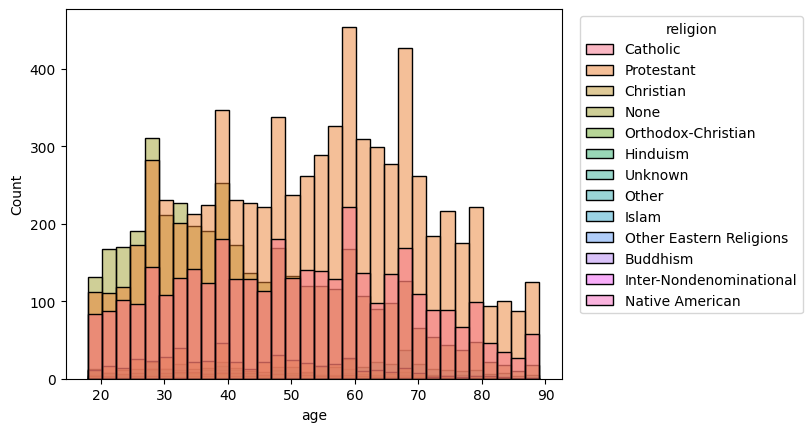

In [ ]:
base=sns.histplot(data=df, hue='religion', x='age')
sns.move_legend(base, "upper right", bbox_to_anchor=(1.5, 1))
# base.set_xticklabels(base.get_xticklabels(), rotation=45)

<ipython-input-52-1888ef9d906c>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  base.set_xticklabels(base.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0.5, 0, 'Religion'),
 Text(0.5, 1.0, "Histogram of Population's Religions as Categorized by Political View")]

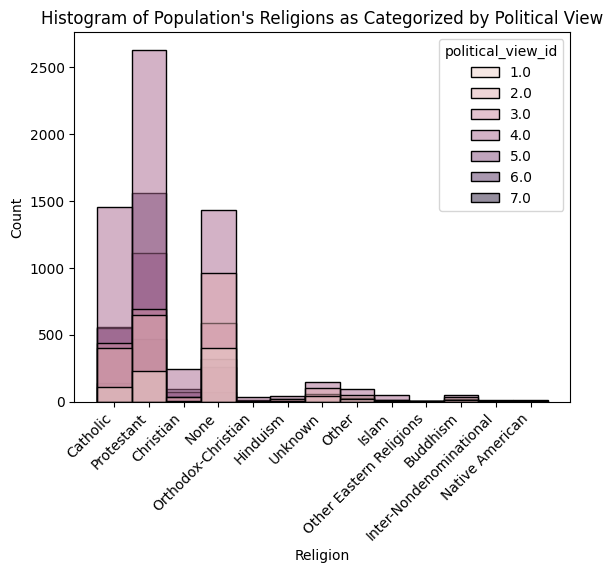

In [ ]:
# harder to look at due to scale and coloring
base = sns.histplot(data=df, x='religion', hue='political_view_id')
base.set_xticklabels(base.get_xticklabels(), rotation=45, horizontalalignment='right')
base.set(xlabel='Religion', title='Histogram of Population\'s Religions as Categorized by Political View')

[Text(0.5, 0, 'Religion'),
 Text(0, 0.5, 'Political View (Liberal to Conservative)'),
 Text(0.5, 1.0, "Line Plot of Religion's Impact on Political View")]

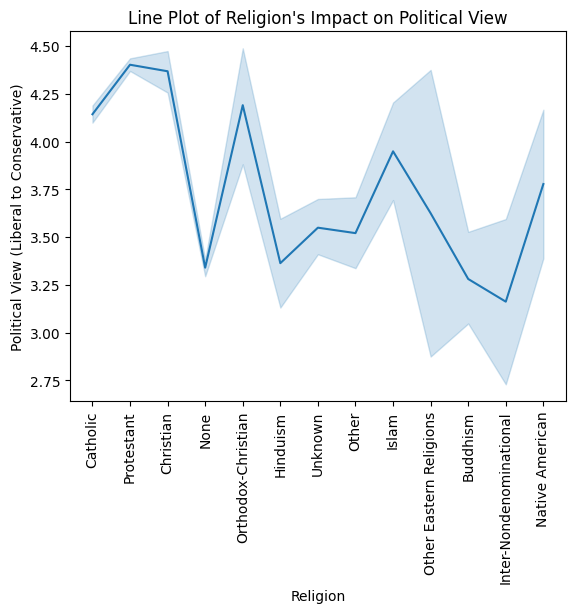

In [ ]:
# curr_plot = sns.lineplot(data=df, x="age", hue="religion", y="political_view_id")
curr_plot = sns.lineplot(data=df, x="religion", y="political_view_id")

curr_plot.tick_params(axis='x', rotation=90)
curr_plot.set(xlabel='Religion', ylabel='Political View (Liberal to Conservative)', title="Line Plot of Religion's Impact on Political View")
# curr_plot.legend(title='Religion')
# sns.move_legend(curr_plot, "upper right", bbox_to_anchor=(1.5, 1))

In [ ]:
df['religion'].value_counts()

Protestant                 7569
None                       4169
Catholic                   3760
Christian                   532
Unknown                     505
Other                       251
Buddhism                    148
Islam                       106
Hinduism                    104
Orthodox-Christian           86
Inter-Nondenominational      37
Other Eastern Religions      18
Native American              18
Name: religion, dtype: int64

In [ ]:
# curr_plot = sns.barplot(data=df, x="age", y="education", hue="political_view_id")

# curr_plot.tick_params(axis='x', rotation=90)
# curr_plot.set(xlabel='Age (Years)', ylabel='Political View (Liberal to Conservative)', title="Line Plot of Degree and Age's Impact on Political View")
# #urr_plot.legend(title='Highest Earned Degree')
# #sns.move_legend(curr_plot, "upper right", bbox_to_anchor=(1.5, 1))

In [ ]:
#OTHER IDEAS FOR PLOTS - thao
#heatmap of degree obtained vs political views
#violin plot of education vs political views
#mosaic plot of happy vs political views
#stacked bar chart of religion vs political views